<a href="https://colab.research.google.com/github/KaikeGM/Challenge-Telecom-X-Data-Science-Parte-2/blob/main/TelecomX_BR_Parte_2_modificado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🛠️ Preparação dos Dados**

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/KaikeGM/TelecomX_BR/refs/heads/main/dados_prontos.csv'
dados = pd.read_csv(url)

In [ ]:
dados.head()

,Churn,Contract,PaymentMethod,PaperlessBilling,Charges.Monthly,Charges.Total,InternetService,OnlineSecurity,TechSupport,StreamingTV,StreamingMovies
0,0,one year,mailed check,yes,65.6,593.30,dsl,no,yes,yes,no
1,0,month-to-month,mailed check,no,59.9,542.40,dsl,no,no,no,yes
2,1,month-to-month,electronic check,yes,73.9,280.85,fiber optic,no,no,no,no
3,1,month-to-month,electronic check,yes,98.0,1237.85,fiber optic,no,no,yes,yes
4,1,month-to-month,mailed check,yes,83.9,267.40,fiber optic,no,yes,yes,no


In [ ]:
dados.shape

(7190, 11)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7190 entries, 0 to 7189
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7190 non-null   int64  
 1   Contract          7190 non-null   object 
 2   PaymentMethod     7190 non-null   object 
 3   PaperlessBilling  7190 non-null   object 
 4   Charges.Monthly   7190 non-null   float64
 5   Charges.Total     7190 non-null   float64
 6   InternetService   7190 non-null   object 
 7   OnlineSecurity    7190 non-null   object 
 8   TechSupport       7190 non-null   object 
 9   StreamingTV       7190 non-null   object 
 10  StreamingMovies   7190 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 618.0+ KB


In [ ]:
dados.describe()

,Churn,Charges.Monthly,Charges.Total
count,7190.000000,7190.000000,7190.000000
mean,0.253547,64.961857,2304.643634
std,0.435071,30.095639,2267.089312
min,0.000000,18.250000,18.800000
25%,0.000000,35.762500,420.262500
50%,0.000000,70.450000,1416.350000
75%,1.000000,90.037500,3827.387500
max,1.000000,118.750000,8684.800000


In [ ]:
dados.describe(include='O')

,Contract,PaymentMethod,PaperlessBilling,InternetService,OnlineSecurity,TechSupport,StreamingTV,StreamingMovies
count,7190,7190,7190,7190,7190,7190,7190,7190
unique,3,4,2,3,3,3,3,3
top,month-to-month,electronic check,yes,fiber optic,no,no,no,no
freq,3928,2412,4268,3169,3569,3543,2857,2832


In [ ]:
dados.nunique()

,0
Churn,2
Contract,3
PaymentMethod,4
PaperlessBilling,2
Charges.Monthly,1585
Charges.Total,6531
InternetService,3
OnlineSecurity,3
TechSupport,3
StreamingTV,3


In [ ]:
dados['PaymentMethod'].unique()

array(['mailed check', 'electronic check', 'credit card (automatic)',
       'bank transfer (automatic)'], dtype=object)

In [ ]:
dados['PaperlessBilling'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
dados['StreamingTV'].unique()

array(['yes', 'no', 'no internet service'], dtype=object)

In [ ]:
dados['TechSupport'].unique()

array(['yes', 'no', 'no internet service'], dtype=object)

In [ ]:
import numpy as np
dados['PaperlessBilling'] = np.int64(dados['PaperlessBilling'].replace({'no': 0, 'yes': 1}))
dados.head()

/tmp/ipython-input-2374845940.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['PaperlessBilling'] = np.int64(dados['PaperlessBilling'].replace({'no': 0, 'yes': 1}))


,Churn,Contract,PaymentMethod,PaperlessBilling,Charges.Monthly,Charges.Total,InternetService,OnlineSecurity,TechSupport,StreamingTV,StreamingMovies
0,0,one year,mailed check,1,65.6,593.30,dsl,no,yes,yes,no
1,0,month-to-month,mailed check,0,59.9,542.40,dsl,no,no,no,yes
2,1,month-to-month,electronic check,1,73.9,280.85,fiber optic,no,no,no,no
3,1,month-to-month,electronic check,1,98.0,1237.85,fiber optic,no,no,yes,yes
4,1,month-to-month,mailed check,1,83.9,267.40,fiber optic,no,yes,yes,no


In [ ]:
variaveis_categoricas = ['Contract', 'PaymentMethod', 'InternetService', 'OnlineSecurity', 'TechSupport', 'StreamingTV', 'StreamingMovies']

In [ ]:
dados = pd.get_dummies(data=dados, columns=variaveis_categoricas, dtype=int)
dados.head()

,Churn,PaperlessBilling,Charges.Monthly,Charges.Total,Contract_month-to-month,Contract_one year,Contract_two year,PaymentMethod_bank transfer (automatic),PaymentMethod_credit card (automatic),PaymentMethod_electronic check,...,OnlineSecurity_yes,TechSupport_no,TechSupport_no internet service,TechSupport_yes,StreamingTV_no,StreamingTV_no internet service,StreamingTV_yes,StreamingMovies_no,StreamingMovies_no internet service,StreamingMovies_yes
0,0,1,65.6,593.30,0,1,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
1,0,0,59.9,542.40,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
2,1,1,73.9,280.85,1,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
3,1,1,98.0,1237.85,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1
4,1,1,83.9,267.40,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0


In [ ]:
dados['Churn'].value_counts() #normalize = True

,count
Churn,
0,5367
1,1823


In [ ]:
x = dados.drop(['Churn'], axis=1)
y = dados['Churn']

# **🎯 Correlação e Seleção de Variáveis**

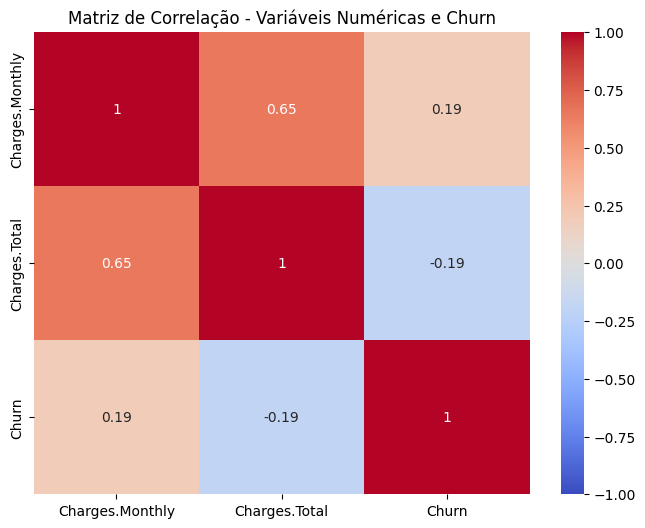

Correlações com Churn:
Churn              1.000000
Charges.Monthly    0.193136
Charges.Total     -0.189112
Name: Churn, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assumindo que x e y são DataFrames/Series com os dados fornecidos
# Concatenar x e y para incluir Churn na análise
data = pd.concat([x, y], axis=1)

# Selecionar apenas variáveis numéricas e Churn
numeric_cols = ['Charges.Monthly', 'Charges.Total', 'Churn']
data_numeric = data[numeric_cols]

# Calcular a matriz de correlação
corr_matrix = data_numeric.corr()

# Plotar heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlação - Variáveis Numéricas e Churn')
plt.show()

# Exibir correlações com Churn em ordem decrescente
print("Correlações com Churn:")
print(corr_matrix['Churn'].sort_values(ascending=False))

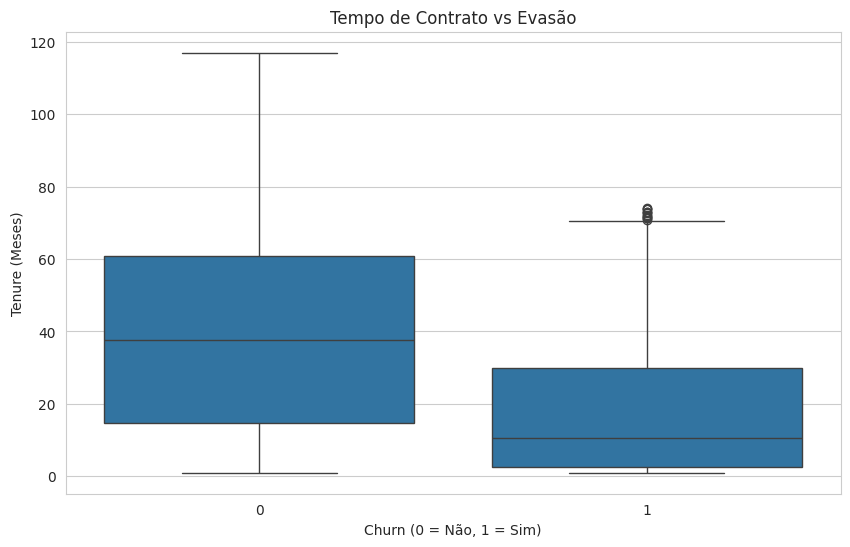


Médias de Tenure por Churn (ordenadas):
Churn 0: 37.6891 meses
Churn 1: 18.3994 meses


In [ ]:
# Configurar estilo do seaborn
try:
    sns.set_style('whitegrid')  # Estilo semelhante ao antigo 'seaborn'
except:
    plt.style.use('ggplot')  # Fallback para ggplot

# Concatenar x e y
data = pd.concat([x, y], axis=1)

# Garantir que Charges.Total e Charges.Monthly sejam numéricos
data['Charges.Total'] = pd.to_numeric(data['Charges.Total'], errors='coerce')
data['Charges.Monthly'] = pd.to_numeric(data['Charges.Monthly'], errors='coerce')

# Calcular Tenure, tratando divisão por zero
data['Tenure'] = data['Charges.Total'] / data['Charges.Monthly'].replace(0, np.nan)

# Remover valores ausentes em Tenure ou Churn
data = data.dropna(subset=['Tenure', 'Churn'])

# Criar boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Tenure', data=data, order=[0, 1])  # Ordenar explicitamente Churn
plt.title('Tempo de Contrato vs Evasão')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Tenure (Meses)')
plt.show()

# Exibir estatísticas para ordenação (ex.: médias de Tenure por Churn)
stats = data.groupby('Churn')['Tenure'].mean().sort_values(ascending=False)
print("\nMédias de Tenure por Churn (ordenadas):")
for churn, tenure in stats.items():
    print(f"Churn {churn}: {tenure:.4f} meses")

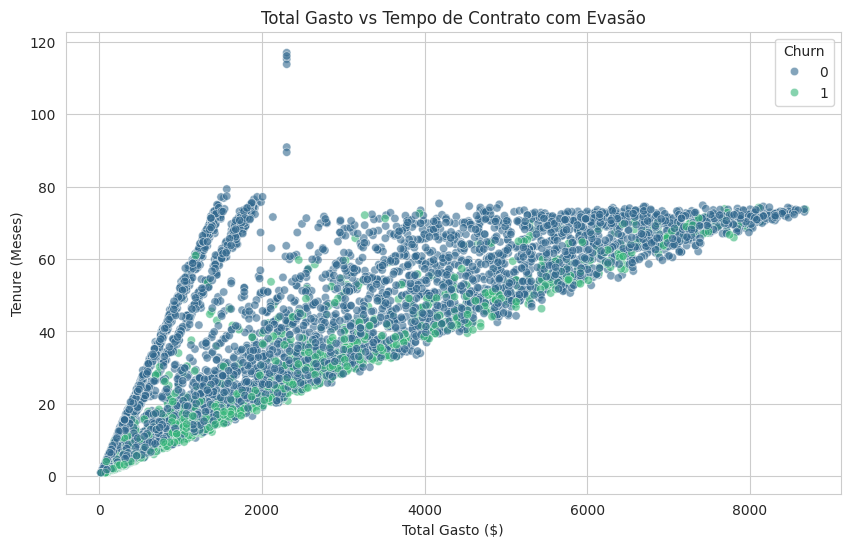

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Charges.Total', y='Tenure', hue='Churn', data=data, palette='viridis', alpha=0.6)
plt.title('Total Gasto vs Tempo de Contrato com Evasão')
plt.xlabel('Total Gasto ($)')
plt.ylabel('Tenure (Meses)')
plt.legend(title='Churn')
plt.show()

# **🤖 Modelagem Preditiva**

# **gjnfnsdgjnsryhjnyrsjywsyjstyj**

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import NearMiss

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def intervalo_conf_df(resultados, tipo, scoring):
    """Gera DataFrame com média e intervalo de confiança das métricas."""
    dados = []
    for metric in scoring:
        scores = resultados[f'test_{metric}']
        media = scores.mean()
        desvio_padrao = scores.std()
        lower = max(0, media - 2 * desvio_padrao)
        upper = min(1, media + 2 * desvio_padrao)
        dados.append({
            'Técnica': tipo,
            'Métrica': metric,
            'Média': round(media, 4),
            'IC Inferior': round(lower, 4),
            'IC Superior': round(upper, 4)
        })
    return pd.DataFrame(dados)

def plot_intervalo_conf(df_resultados):
    """Plota gráfico de intervalo de confiança."""
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_resultados, x='Métrica', y='Média', hue='Técnica', ci=None)
    for i, row in df_resultados.iterrows():
        plt.plot([i % len(df_resultados['Métrica'].unique()), i % len(df_resultados['Métrica'].unique())],
                 [row['IC Inferior'], row['IC Superior']], color='black', linewidth=2)
    plt.title("Médias e Intervalos de Confiança")
    plt.ylim(0, 1)
    plt.legend(title='Técnica')
    plt.show()

def plot_feature_importances(model, feature_names, top_n=10):
    """Plota as top N features mais importantes."""
    importances = model.named_steps['arvore'].feature_importances_
    feat_df = pd.DataFrame({'Features': feature_names, 'Importances': importances})
    feat_df = feat_df.sort_values('Importances', ascending=False).head(top_n)
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Importances', y='Features', data=feat_df)
    plt.title(f"Top {top_n} Features")
    plt.show()

def plot_confusion_matrix_and_roc(model, X_test, y_test):
    """Plota matriz de confusão e curva ROC."""
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[0])
    axes[0].set_title("Matriz de Confusão")
    axes[0].set_xlabel("Previsto")
    axes[0].set_ylabel("Real")

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    axes[1].plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
    axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
    axes[1].set_title("Curva ROC")
    axes[1].set_xlabel("Falso Positivo")
    axes[1].set_ylabel("Verdadeiro Positivo")
    axes[1].legend()

    plt.show()

def avaliar_varios_thresholds(modelo, X_test, y_test, thresholds=np.arange(0.1, 1.0, 0.1)):
    resultados = []

    # Probabilidades da classe positiva
    probs = modelo.predict_proba(X_test)[:, 1]

    # Avaliação em diferentes thresholds
    for thr in thresholds:
        preds = (probs >= thr).astype(int)
        precision = precision_score(y_test, preds)
        recall = recall_score(y_test, preds)
        f1 = f1_score(y_test, preds)
        acc = accuracy_score(y_test, preds)
        resultados.append({
            'threshold': thr,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'accuracy': acc
        })

    # Criar DataFrame com os resultados
    df_resultados = pd.DataFrame(resultados)



    # Plotar gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(df_resultados['threshold'], df_resultados['precision'], marker='o', label='Precision')
    plt.plot(df_resultados['threshold'], df_resultados['recall'], marker='o', label='Recall')
    plt.plot(df_resultados['threshold'], df_resultados['f1_score'], marker='o', label='F1 Score')
    plt.plot(df_resultados['threshold'], df_resultados['accuracy'], marker='o', label='Accuracy')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title('Métricas vs Threshold')
    plt.grid(True)
    plt.legend()
    plt.show()

    return df_resultados

In [ ]:
# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30, random_state=42, stratify=y
)

In [ ]:
# Seleção de Features (RandomForest inicial)
modelo_inicial = RandomForestClassifier(random_state=42)
modelo_inicial.fit(X_train, y_train)
importances = modelo_inicial.feature_importances_

feature_importances = pd.DataFrame({
    'Features': X_train.columns,
    'Importances': importances
}).sort_values('Importances', ascending=False)

top_features = feature_importances['Features'].head(10).tolist()
print(f"Top 10 features selecionadas: {top_features}")

X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

Top 10 features selecionadas: ['Charges.Total', 'Charges.Monthly', 'Contract_month-to-month', 'OnlineSecurity_no', 'TechSupport_no', 'PaymentMethod_electronic check', 'PaperlessBilling', 'Contract_two year', 'InternetService_fiber optic', 'PaymentMethod_bank transfer (automatic)']


In [ ]:
# Pipelines de balanceamento
smote = BorderlineSMOTE(random_state=42)  # Oversample
near_miss = NearMiss(version=3)           # Undersample

# RandomForest
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
pipeline_rf_oversample = imbpipeline([('oversample', smote), ('arvore', rf_model)])
pipeline_rf_undersample = imbpipeline([('undersample', near_miss), ('arvore', rf_model)])

# DecisionTree
dt_model = DecisionTreeClassifier(random_state=42)
pipeline_dt_oversample = imbpipeline([('oversample', smote), ('arvore', dt_model)])
pipeline_dt_undersample = imbpipeline([('undersample', near_miss), ('arvore', dt_model)])

In [ ]:
# Função de intervalo de confiança
scoring = ['recall', 'f1', 'roc_auc', 'precision']
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def intervalo_conf(resultados, tipo):
    for metric in scoring:
        scores = resultados[f'test_{metric}']
        media = scores.mean()
        dp = scores.std()
        lower = max(0, media - 2*dp)
        upper = min(1, media + 2*dp)
        print(f"{tipo} ({metric}): Média={media:.4f}, IC=[{lower:.4f}, {upper:.4f}]")

In [ ]:
# Avaliação inicial
# RandomForest
RF_Oversampling_resultados = cross_validate(
    pipeline_rf_oversample,
    X_train_selected, y_train,
    cv=skf, scoring=scoring
)
RF_Undersampling_resultados = cross_validate(
    pipeline_rf_undersample,
    X_train_selected, y_train,
    cv=skf, scoring=scoring
)
intervalo_conf(RF_Oversampling_resultados, "RandomForest Oversampling")
intervalo_conf(RF_Undersampling_resultados, "RandomForest Undersampling")

RandomForest Oversampling (recall): Média=0.6238, IC=[0.5615, 0.6861]
RandomForest Oversampling (f1): Média=0.5407, IC=[0.5119, 0.5694]
RandomForest Oversampling (roc_auc): Média=0.7793, IC=[0.7670, 0.7915]
RandomForest Oversampling (precision): Média=0.4775, IC=[0.4599, 0.4951]
RandomForest Undersampling (recall): Média=0.6685, IC=[0.6115, 0.7255]
RandomForest Undersampling (f1): Média=0.5469, IC=[0.5278, 0.5660]
RandomForest Undersampling (roc_auc): Média=0.7733, IC=[0.7520, 0.7946]
RandomForest Undersampling (precision): Média=0.4631, IC=[0.4574, 0.4688]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_intervalo_conf(resultados, tipo):
    data = []
    for metric in scoring:
        scores = resultados[f'test_{metric}']
        media = scores.mean()
        dp = scores.std()
        lower = max(0, media - 2*dp)
        upper = min(1, media + 2*dp)
        data.append([metric, media, lower, upper])
    df = pd.DataFrame(data, columns=["Métrica", "Média", "IC_min", "IC_max"])

    plt.figure(figsize=(8,4))
    plt.bar(df["Métrica"], df["Média"], yerr=[df["Média"] - df["IC_min"], df["IC_max"] - df["Média"]], capsize=5)
    plt.title(f"{tipo} - Intervalos de Confiança")
    plt.ylim(0, 1)
    plt.show()


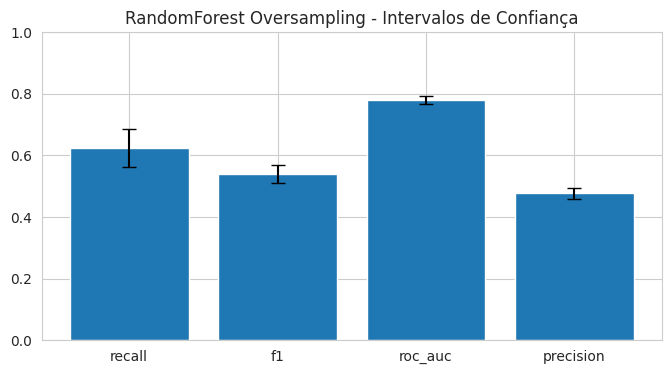

In [ ]:
plot_intervalo_conf(RF_Oversampling_resultados, "RandomForest Oversampling")

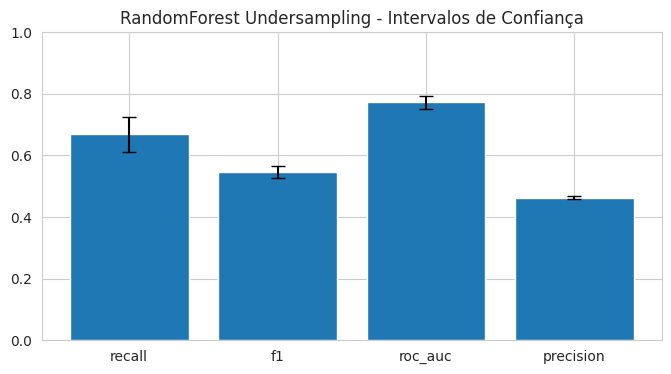

In [ ]:
plot_intervalo_conf(RF_Undersampling_resultados, "RandomForest Undersampling")

In [ ]:
# DecisionTree
DT_Oversampling_resultados = cross_validate(
    pipeline_dt_oversample,
    X_train_selected, y_train,
    cv=skf, scoring=scoring
)
DT_Undersampling_resultados = cross_validate(
    pipeline_dt_undersample,
    X_train_selected, y_train,
    cv=skf, scoring=scoring
)
intervalo_conf(DT_Oversampling_resultados, "DecisionTree Oversampling")
intervalo_conf(DT_Undersampling_resultados, "DecisionTree Undersampling")

DecisionTree Oversampling (recall): Média=0.5486, IC=[0.4886, 0.6086]
DecisionTree Oversampling (f1): Média=0.4800, IC=[0.4315, 0.5285]
DecisionTree Oversampling (roc_auc): Média=0.6521, IC=[0.6148, 0.6894]
DecisionTree Oversampling (precision): Média=0.4268, IC=[0.3848, 0.4687]
DecisionTree Undersampling (recall): Média=0.6457, IC=[0.5820, 0.7094]
DecisionTree Undersampling (f1): Média=0.4843, IC=[0.4485, 0.5202]
DecisionTree Undersampling (roc_auc): Média=0.6495, IC=[0.6190, 0.6799]
DecisionTree Undersampling (precision): Média=0.3876, IC=[0.3634, 0.4118]


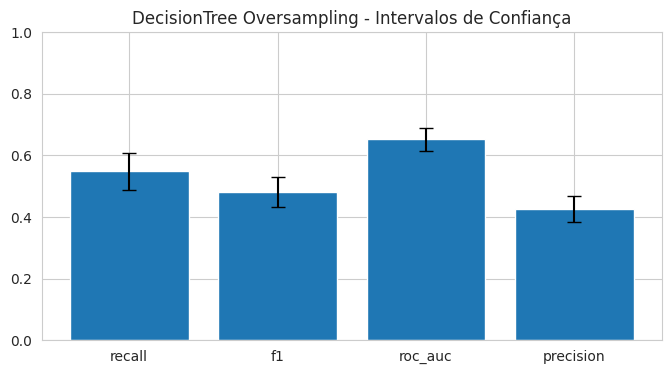

In [ ]:
plot_intervalo_conf(DT_Oversampling_resultados, "DecisionTree Oversampling")

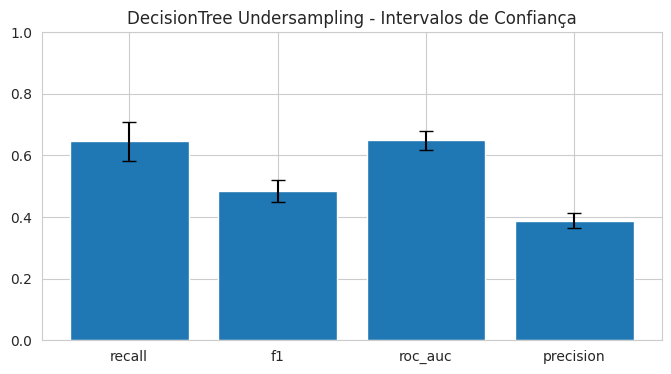

In [ ]:
plot_intervalo_conf(DT_Undersampling_resultados, "DecisionTree Undersampling")

In [ ]:
# GridSearch para otimizar hiperparâmetros
# Parâmetros para RandomForest
param_grid_rf = {
    'arvore__max_depth': [5, 10, 15],
    'arvore__min_samples_leaf': [1, 2, 3],
    'arvore__min_samples_split': [2, 4, 6],
    'arvore__n_estimators': [100, 150, 200]
}

In [ ]:
# Parâmetros para DecisionTree
param_grid_dt = {
    'arvore__max_depth': [5, 10, 15],
    'arvore__min_samples_leaf': [1, 2, 3],
    'arvore__min_samples_split': [2, 4, 6]
}

In [ ]:
# RandomForest GridSearch
grid_search_rf_over = GridSearchCV(pipeline_rf_oversample, param_grid=param_grid_rf, cv=skf, scoring='f1', n_jobs=-1)
grid_search_rf_under = GridSearchCV(pipeline_rf_undersample, param_grid=param_grid_rf, cv=skf, scoring='f1', n_jobs=-1)

In [ ]:
grid_search_rf_over.fit(X_train_selected, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('oversample',
                                        BorderlineSMOTE(random_state=42)),
                                       ('arvore',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'arvore__max_depth': [5, 10, 15],
                         'arvore__min_samples_leaf': [1, 2, 3],
                         'arvore__min_samples_split': [2, 4, 6],
                         'arvore__n_estimators': [100, 150, 200]},
             scoring='f1')

In [ ]:
grid_search_rf_under.fit(X_train_selected, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('undersample', NearMiss(version=3)),
                                       ('arvore',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'arvore__max_depth': [5, 10, 15],
                         'arvore__min_samples_leaf': [1, 2, 3],
                         'arvore__min_samples_split': [2, 4, 6],
                         'arvore__n_estimators': [100, 150, 200]},
             scoring='f1')

In [ ]:
print("\nRandomForest Oversampling - Melhores parâmetros:", grid_search_rf_over.best_params_)
print("Melhor F1:", grid_search_rf_over.best_score_)
print("RandomForest Undersampling - Melhores parâmetros:", grid_search_rf_under.best_params_)
print("Melhor F1:", grid_search_rf_under.best_score_)


RandomForest Oversampling - Melhores parâmetros: {'arvore__max_depth': 10, 'arvore__min_samples_leaf': 3, 'arvore__min_samples_split': 2, 'arvore__n_estimators': 150}
Melhor F1: 0.5868908597980107
RandomForest Undersampling - Melhores parâmetros: {'arvore__max_depth': 5, 'arvore__min_samples_leaf': 2, 'arvore__min_samples_split': 2, 'arvore__n_estimators': 100}
Melhor F1: 0.601621298603921


In [ ]:
# DecisionTree GridSearch
grid_search_dt_over = GridSearchCV(pipeline_dt_oversample, param_grid=param_grid_dt, cv=skf, scoring='f1', n_jobs=-1)
grid_search_dt_under = GridSearchCV(pipeline_dt_undersample, param_grid=param_grid_dt, cv=skf, scoring='f1', n_jobs=-1)

In [ ]:
grid_search_dt_over.fit(X_train_selected, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('oversample',
                                        BorderlineSMOTE(random_state=42)),
                                       ('arvore',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'arvore__max_depth': [5, 10, 15],
                         'arvore__min_samples_leaf': [1, 2, 3],
                         'arvore__min_samples_split': [2, 4, 6]},
             scoring='f1')

In [ ]:
grid_search_dt_under.fit(X_train_selected, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('undersample', NearMiss(version=3)),
                                       ('arvore',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'arvore__max_depth': [5, 10, 15],
                         'arvore__min_samples_leaf': [1, 2, 3],
                         'arvore__min_samples_split': [2, 4, 6]},
             scoring='f1')

In [ ]:
print("\nDecisionTree Oversampling - Melhores parâmetros:", grid_search_dt_over.best_params_)
print("Melhor F1:", grid_search_dt_over.best_score_)
print("DecisionTree Undersampling - Melhores parâmetros:", grid_search_dt_under.best_params_)
print("Melhor F1:", grid_search_dt_under.best_score_)


DecisionTree Oversampling - Melhores parâmetros: {'arvore__max_depth': 5, 'arvore__min_samples_leaf': 2, 'arvore__min_samples_split': 2}
Melhor F1: 0.5665187055081243
DecisionTree Undersampling - Melhores parâmetros: {'arvore__max_depth': 5, 'arvore__min_samples_leaf': 2, 'arvore__min_samples_split': 2}
Melhor F1: 0.5760495487016242


In [ ]:
# Importâncias com RandomForest Oversample
best_model_rf_over = grid_search_rf_over.best_estimator_.named_steps['arvore']
importances = best_model_rf_over.feature_importances_
feature_importances = pd.DataFrame({
    'Features': X_train_selected.columns,
    'Importances': importances
})
feature_importances = feature_importances.sort_values('Importances', ascending=False)
print('RandomForest Oversample - Top 10 Features')
print(feature_importances.head(10))


RandomForest Oversample - Top 10 Features
                                  Features  Importances
0                            Charges.Total     0.240896
1                          Charges.Monthly     0.213235
7                        Contract_two year     0.183545
2                  Contract_month-to-month     0.134026
9  PaymentMethod_bank transfer (automatic)     0.075579
8              InternetService_fiber optic     0.059899
3                        OnlineSecurity_no     0.037557
4                           TechSupport_no     0.026442
5           PaymentMethod_electronic check     0.014723
6                         PaperlessBilling     0.014097


In [ ]:
# Importâncias com RandomForest Undersample
best_model_rf_under = grid_search_rf_under.best_estimator_.named_steps['arvore']
importances = best_model_rf_under.feature_importances_
feature_importances = pd.DataFrame({
    'Features': X_train_selected.columns,
    'Importances': importances
})

feature_importances = feature_importances.sort_values('Importances', ascending=False)
print('RandomForest Undersample - Top 10 Features')
print(feature_importances.head(10))


RandomForest Undersample - Top 10 Features
                                  Features  Importances
0                            Charges.Total     0.413918
2                  Contract_month-to-month     0.218818
1                          Charges.Monthly     0.074387
7                        Contract_two year     0.066852
3                        OnlineSecurity_no     0.062583
5           PaymentMethod_electronic check     0.055230
4                           TechSupport_no     0.049569
8              InternetService_fiber optic     0.036755
6                         PaperlessBilling     0.012656
9  PaymentMethod_bank transfer (automatic)     0.009231



--- Oversample Melhor Modelo ---
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1610
           1       0.47      0.76      0.58       547

    accuracy                           0.72      2157
   macro avg       0.68      0.73      0.69      2157
weighted avg       0.79      0.72      0.74      2157



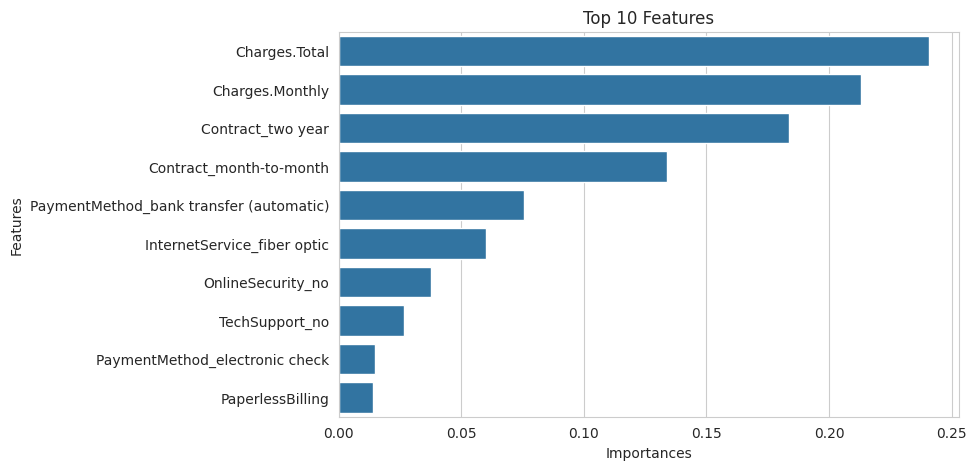

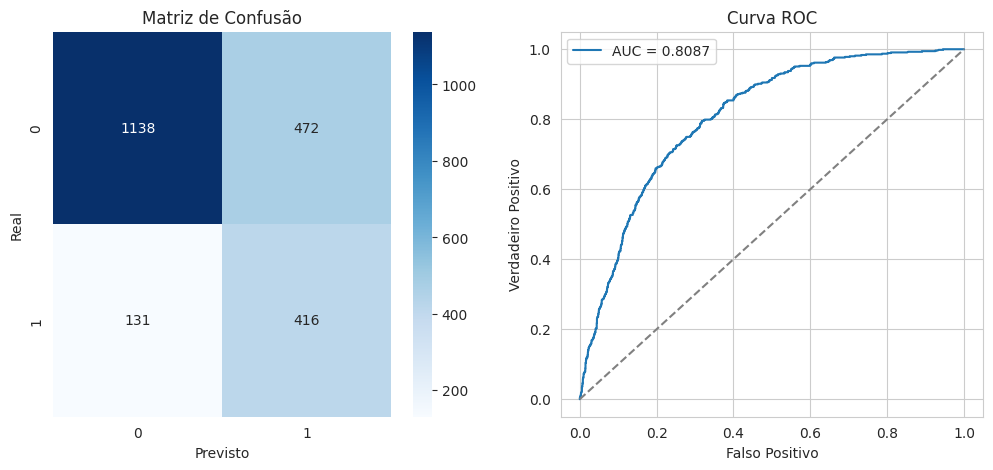

In [ ]:
print("\n--- Oversample Melhor Modelo ---")
y_pred_over = grid_search_rf_over.best_estimator_.predict(X_test_selected)
print(classification_report(y_test, y_pred_over))
plot_feature_importances(grid_search_rf_over.best_estimator_, X_train_selected.columns)
plot_confusion_matrix_and_roc(grid_search_rf_over.best_estimator_, X_test_selected, y_test)


--- Undersample Melhor Modelo ---
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1610
           1       0.51      0.73      0.60       547

    accuracy                           0.75      2157
   macro avg       0.70      0.74      0.71      2157
weighted avg       0.79      0.75      0.76      2157



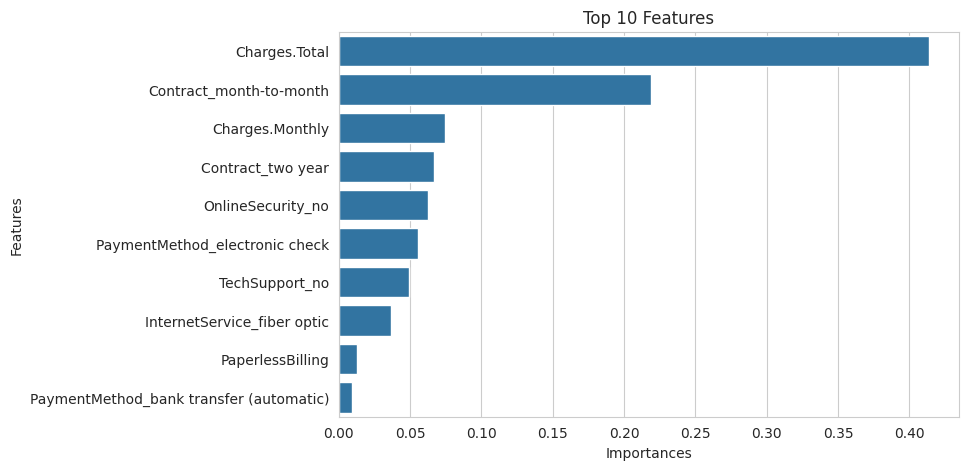

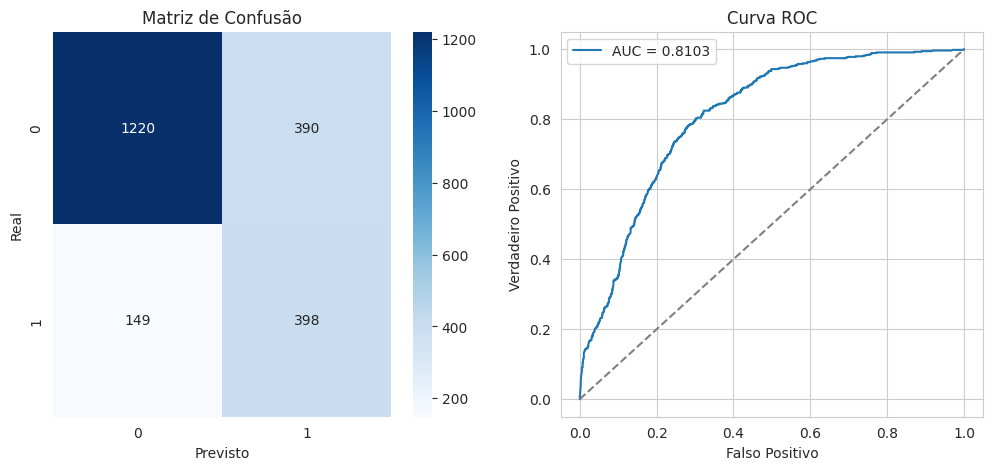

In [ ]:
print("\n--- Undersample Melhor Modelo ---")
y_pred_under = grid_search_rf_under.best_estimator_.predict(X_test_selected)
print(classification_report(y_test, y_pred_under))
plot_feature_importances(grid_search_rf_under.best_estimator_, X_train_selected.columns)
plot_confusion_matrix_and_roc(grid_search_rf_under.best_estimator_, X_test_selected, y_test)

# **tudo aaaaaaaaa**